# TP 1 Mesures de performance

# Importation des librairies necessaires au travail

In [122]:
#utilities
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, roc_curve, auc
from sklearn.preprocessing import Normalizer
#algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Lecture des fichiers de données à classifier


In [2]:
df=pd.read_csv("dataset.csv")
df.head()

,label_num,label,0,1,2,3,4,5,6,7,...,31540,31541,31542,31543,31544,31545,31546,31547,31548,31549
0,0,easy_ham,14,11,14,43,17,1,2,10,...,0,0,0,0,0,0,0,0,0,0
1,0,easy_ham,10,0,0,45,13,1,1,9,...,0,0,0,0,0,0,0,0,0,0
2,0,easy_ham,4,0,0,15,5,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,0,easy_ham,10,0,0,39,12,1,2,10,...,0,0,0,0,0,0,0,0,0,0
4,0,easy_ham,10,0,0,31,13,1,1,6,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 0].values
print(X.shape)
print(y.shape)

(9349, 31550)
(9349,)


Définition de la base d'entrainement X_train, y_train et la base de test X_test, Y_test avec normalisation des données en utilisant la méthode euclidienne (Normalisation L2)

In [36]:

normalizer = Normalizer(norm='l2')
X_normalized = normalizer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state=0, train_size=0.7)

In [41]:
#Fonction pour afficher la matrice de confusion
def plot_cm(y_test,y_pred):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

In [42]:
predictions=dict()

# Phase d'Apprantissage

# Méthodes Supervisées

# Méthode 1: K- Plus Proches Voisins

In [43]:
#training the model
k_neighbors_classifier=KNeighborsClassifier(n_neighbors=5)
k_neighbors_classifier.fit(X_train,y_train)


KNeighborsClassifier()

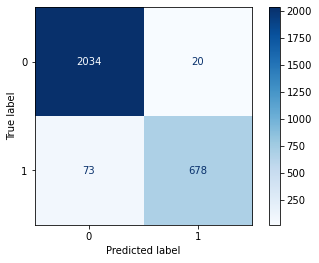

In [89]:
predictions['KNN']=k_neighbors_classifier.predict(X_test)
plot_cm(y_test,predictions['KNN'])

# Méthode 2: MVS
Machine à Vecteurs de Support

In [46]:
#training the model
svm_classifier= svm.SVC(kernel='linear') 
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

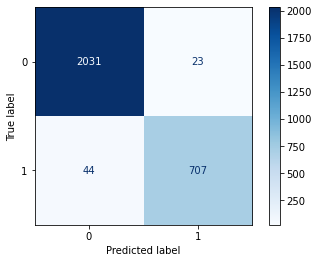

In [88]:
predictions['SVM']=svm_classifier.predict(X_test)
plot_cm(y_test,predictions['SVM'])

# Méthode 3: Arbres de décision

In [48]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

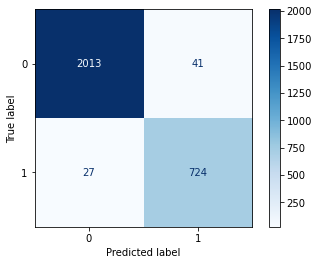

In [50]:
predictions['DT'] = decision_tree_classifier.predict(X_test)
plot_cm(y_test,predictions['DT'])


# Méthode 4: RL
Régression Logistique

In [52]:
lr_classifier=LogisticRegression()
lr_classifier.fit(X_train,y_train)

LogisticRegression()

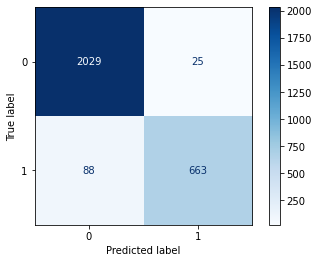

In [53]:
predictions['RL'] = lr_classifier.predict(X_test)
plot_cm(y_test,predictions['RL'])

# Méthode 5: Naive Bayes  

In [85]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

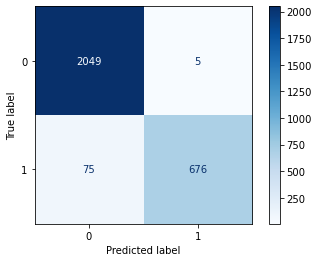

In [86]:
predictions['NB'] = nb_classifier.predict(X_test)
plot_cm(y_test,predictions['NB'])

# Méthode 6: MLP
Multi Layer Perceptron (RN)

In [63]:
mlp_classifier=MLPClassifier()
mlp_classifier.fit(X_train,y_train)

MLPClassifier()

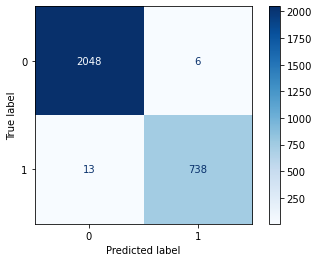

In [64]:
predictions['MLP'] = mlp_classifier.predict(X_test)
plot_cm(y_test,predictions['MLP'])

# Méthodes Non Supervisées 

# K-Means

In [101]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300,random_state=1)
kmeans.fit(X_train)

KMeans(n_clusters=2, random_state=1)

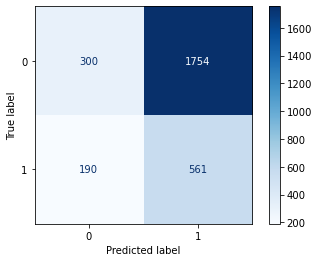

In [102]:
predictions['KMeans']=kmeans.predict(X_test)
plot_cm(y_test,predictions['KMeans'])

# Comparaison Entre les Algorithmes

In [125]:
df_results = pd.DataFrame(columns=["Algorithm", "Precision", "Recall", "F1-Score"])
# Pour chaque modèle, entraîner et évaluer
for name, y_pred in predictions.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    df_results = pd.concat([df_results,pd.DataFrame.from_dict({"Algorithm": name,
                                    "Precision": report["weighted avg"]["precision"],
                                    "Recall": report["weighted avg"]["recall"],
                                    "F1-Score": report["weighted avg"]["f1-score"]}, orient='index').T],
                                   ignore_index=True)
df_results




,Algorithm,Precision,Recall,F1-Score
0,DT,0.975959,0.975758,0.975828
1,RL,0.959832,0.959715,0.959137
2,MLP,0.993222,0.993226,0.993216
3,NB,0.972177,0.97148,0.971021
4,SVM,0.976037,0.976114,0.976005
5,KNN,0.966958,0.966845,0.96645
6,KMeans,0.513206,0.306952,0.270682


# Courbe ROC

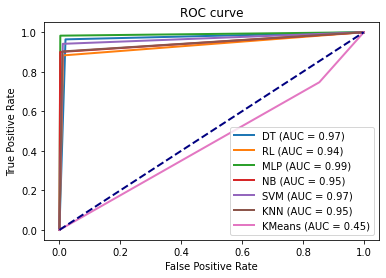

In [126]:
plt.figure()
for name, y_pred in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# Analyse

Note : Dans l'analyse il faut comparer entre les algorithmes supervisé et dire pourquoi l'un et meilleur que l'autre (donner une explication du fonctionnement des algos) aprés faire un comparatif entre le meilleur algo supervisé et non supervisé et donner une explication


# Conclusion